In [5]:
import cv2
import matplotlib.pyplot as plt
import kornia as K
import torch
import torchvision

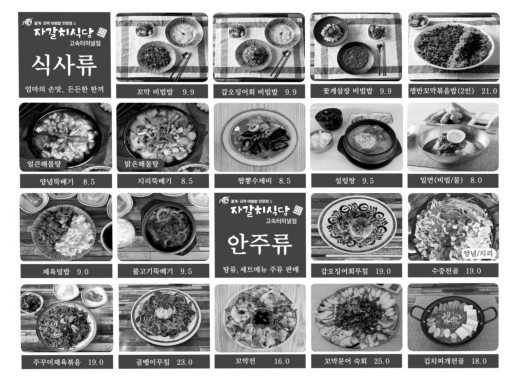

In [22]:
img = cv2.imread("2078.png", cv2.IMREAD_COLOR)
img = K.utils.image_to_tensor(img)

img = img.unsqueeze(0)
img = img.float() / 255.
img = K.color.bgr_to_grayscale(img)

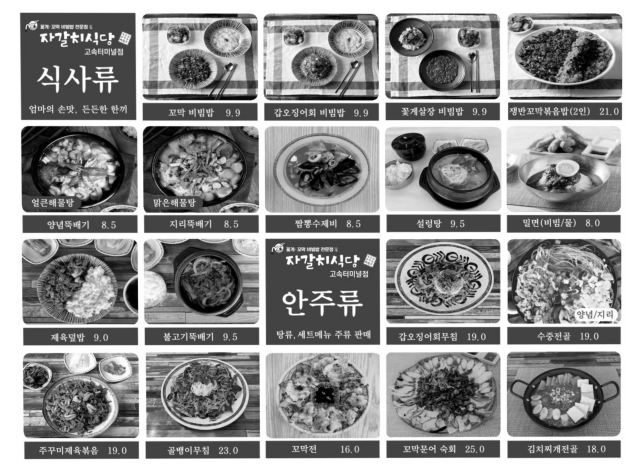

In [60]:
def show_image(img):
    grid = torchvision.utils.make_grid(img)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis("off")
    plt.show()


show_image(img)

# 1st Order Derivatives

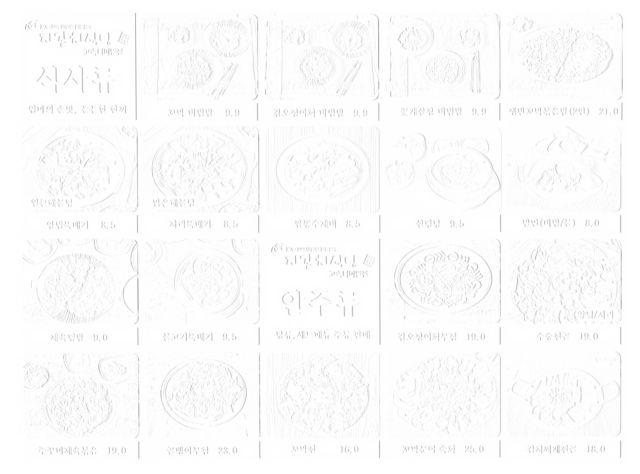

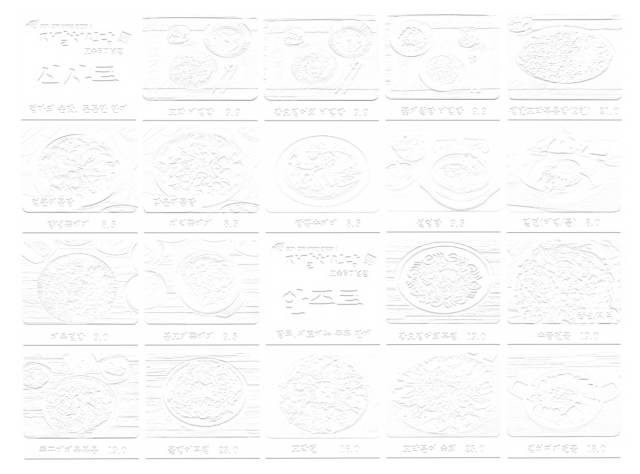

In [61]:
# Shape: (B, C, 2, H, W)
grads = K.filters.spatial_gradient(img, order=1)
grads_x = grads[:, :, 0, :, :]
grads_x = 1 - grads_x.clamp(min=0, max=1)
grads_y = grads[:, :, 1, :, :]
grads_y = 1 - grads_y.clamp(min=0, max=1)

show_image(grads_x)
show_image(grads_y)

# 2nd Order Derivatives

In [62]:
# Shape: (B, C, 2, H, W)
grads = K.filters.spatial_gradient(img, order=2)
grads_x = grads[:, :, 0, :, :]
grads_x = 1 - grads_x.clamp(min=0, max=1)
grads_y = grads[:, :, 1, :, :]
grads_y = 1 - grads_y.clamp(min=0, max=1)

show_image(grads_x)
show_image(grads_y)

# Sobel Edges

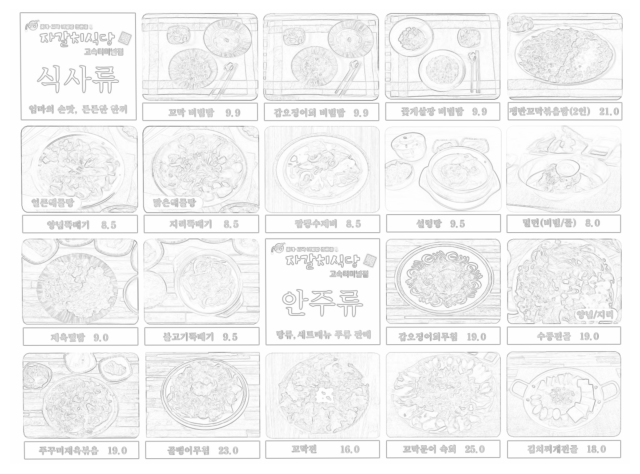

In [64]:
x_sobel = K.filters.sobel(img)

show_image(1 - x_sobel)

# Laplacian Edges

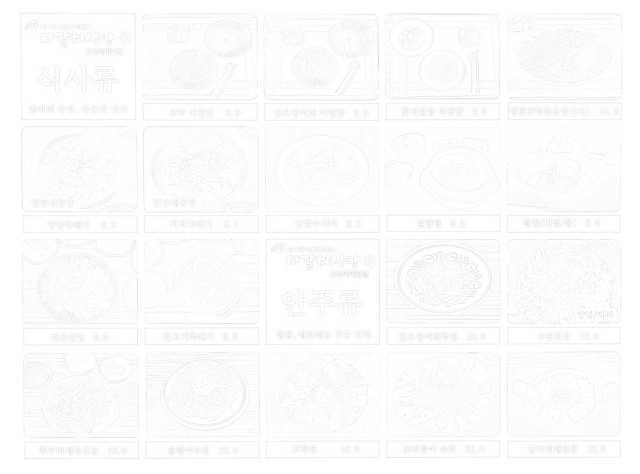

In [75]:
laplacian = K.filters.laplacian(img, kernel_size=5)

show_image(1 - laplacian.clamp(min=0, max=1))

# Canny Edges

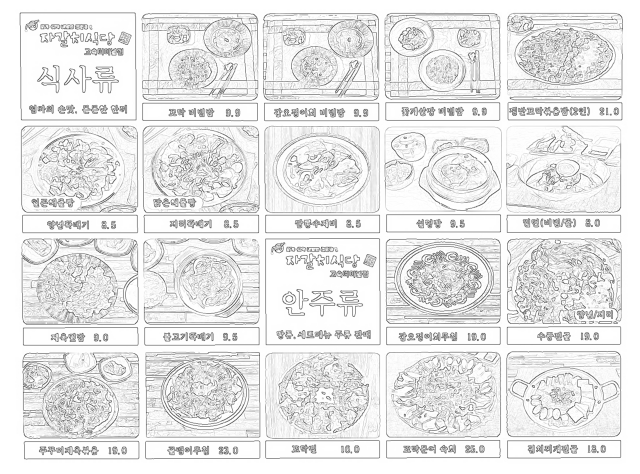

In [77]:
canny = K.filters.canny(img)[0]

show_image(1 - canny.clamp(min=0, max=1))